In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import numpy as np
import numpy.random as rd
import pandas as pd
import html5lib, time, sys
from datetime import datetime as dt
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm
import cPickle as pickle
#plt.style.use('ggplot')



In [2]:

url = 'http://www.toeic.or.jp/toeic/about/data/data_avelist/data_dist01_04.html'
fetched_dataframes = pd.io.html.read_html(url, header=0, index_col=0)
df = fetched_dataframes[0]
df

,Listening,Reading,Score Intervals.1,Total,Unnamed: 5,Unnamed: 6,Unnamed: 7
Score Intervals,,,,,,,
（スコア区分）,人数,%,人数,%,（スコア区分）,人数,%
470～,3454,95.8,867,98.9,895～,2831,96.6
445～,3839,91.1,1279,97.4,845～,3129,92.8
420～,5193,84.8,2377,94.5,795～,4556,87.2
395～,5437,78.2,3737,90.0,745～,5607,80.4
370～,6820,69.9,5127,83.7,695～,6681,72.3
345～,9016,59.0,4577,78.2,645～,7780,62.8
320～,9433,47.5,6826,69.9,595～,8431,52.6
295～,7506,38.4,6822,61.6,545～,8650,42.1


In [3]:
df_total = df[['Unnamed: 5','Unnamed: 6','Unnamed: 7']]
df_total.columns = ['score','num','ratio']

In [4]:
df_total.head(5)


,score,num,ratio
Score Intervals,,,
（スコア区分）,（スコア区分）,人数,%
470～,895～,2831,96.6
445～,845～,3129,92.8
420～,795～,4556,87.2
395～,745～,5607,80.4


In [5]:
df_total.index = df_total['score']
df_total = df_total.drop([u'（スコア区分）']).drop(['Total']).drop(['score'], axis=1).convert_objects(convert_numeric=True)
df_total

,num,ratio
score,,
895～,2831,96.6
845～,3129,92.8
795～,4556,87.2
745～,5607,80.4
695～,6681,72.3
645～,7780,62.8
595～,8431,52.6
545～,8650,42.1
495～,8130,32.2


In [6]:
df_total['sortkey'] = [int(idx.replace(u'\uff5e','')) for idx in df_total.index]

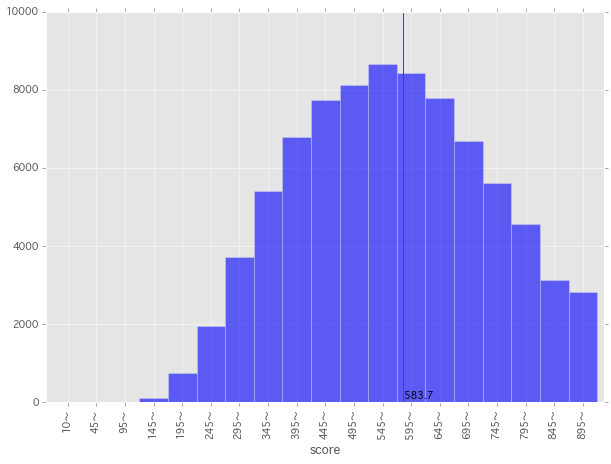

In [7]:
df_total.sort(columns='sortkey')['num'].plot(kind='bar', color='b', alpha=.6, figsize=(10,7),width=1)
plt.plot([11.7,11.7],[0,10000], color='r')
plt.text(11.8, 100, '583.7')

In [8]:
# 箱ヒゲ図



In [12]:
gr_num = 3
mu = rd.normal(40,5,gr_num)

data = np.array([rd.normal(mu[i], 10, 100) for i in range(gr_num)])




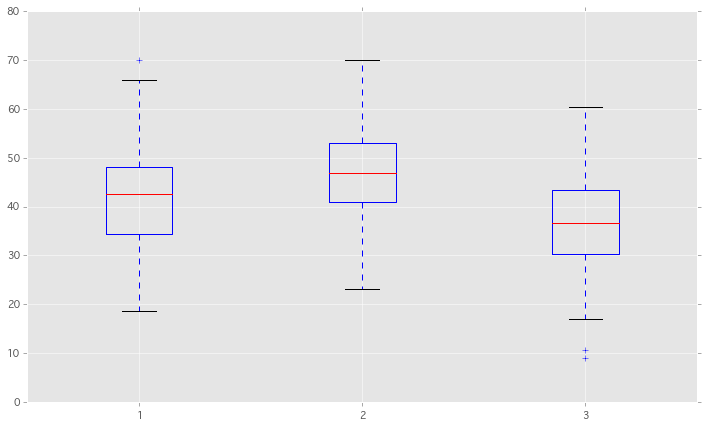

In [17]:
plt.figure(figsize=(12,7))
plt.boxplot(data.T)
plt.show()

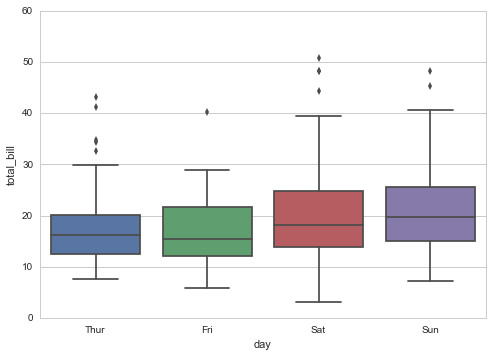

In [22]:

sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="day", y="total_bill", data=tips)


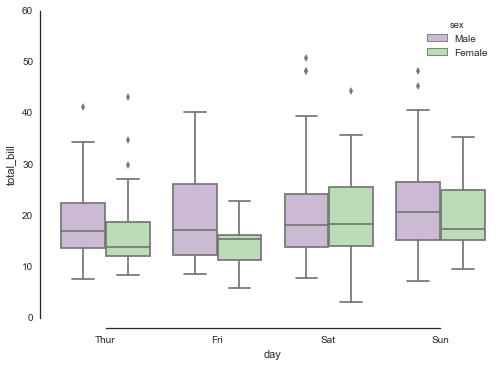

In [140]:
# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

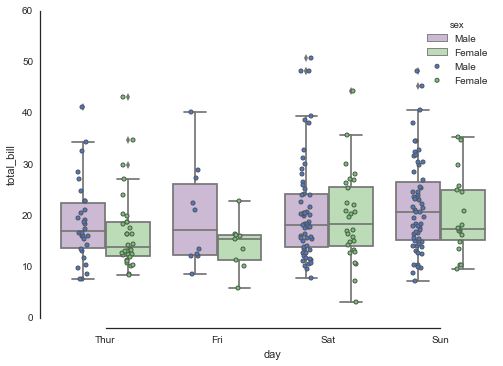

In [147]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
ax = sns.stripplot(x="day", y="total_bill", data=tips,  hue="sex",
                   size=4, jitter=True, edgecolor="gray")
sns.despine(offset=10, trim=True)

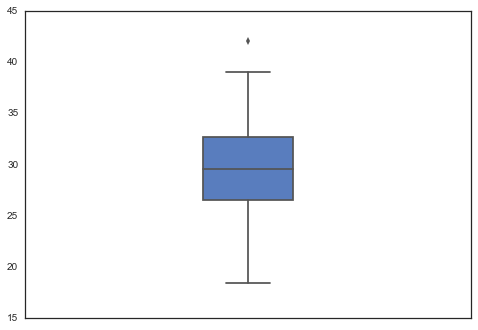

In [169]:
d = rs.normal(30, 5, size=100)
sns.boxplot(y=d, width=.2)

In [141]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.

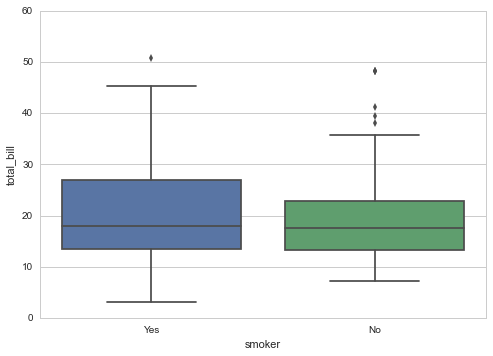

In [29]:

ax = sns.boxplot(x="smoker", y="total_bill", data=tips)

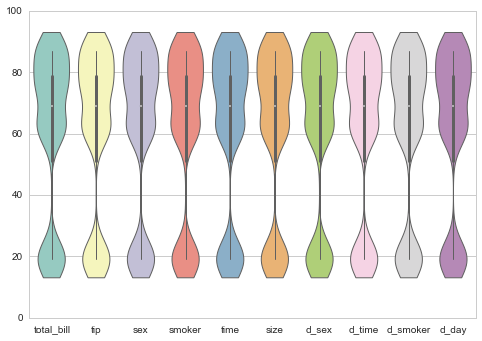

In [52]:
data=tips.groupby('day').count()
sns.violinplot(data=data, palette="Set3", bw=.2, cut=1, linewidth=1)

In [50]:
data

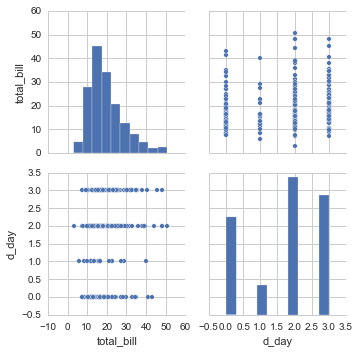

In [43]:
sns.pairplot(data=tips, vars=["total_bill","d_day"])

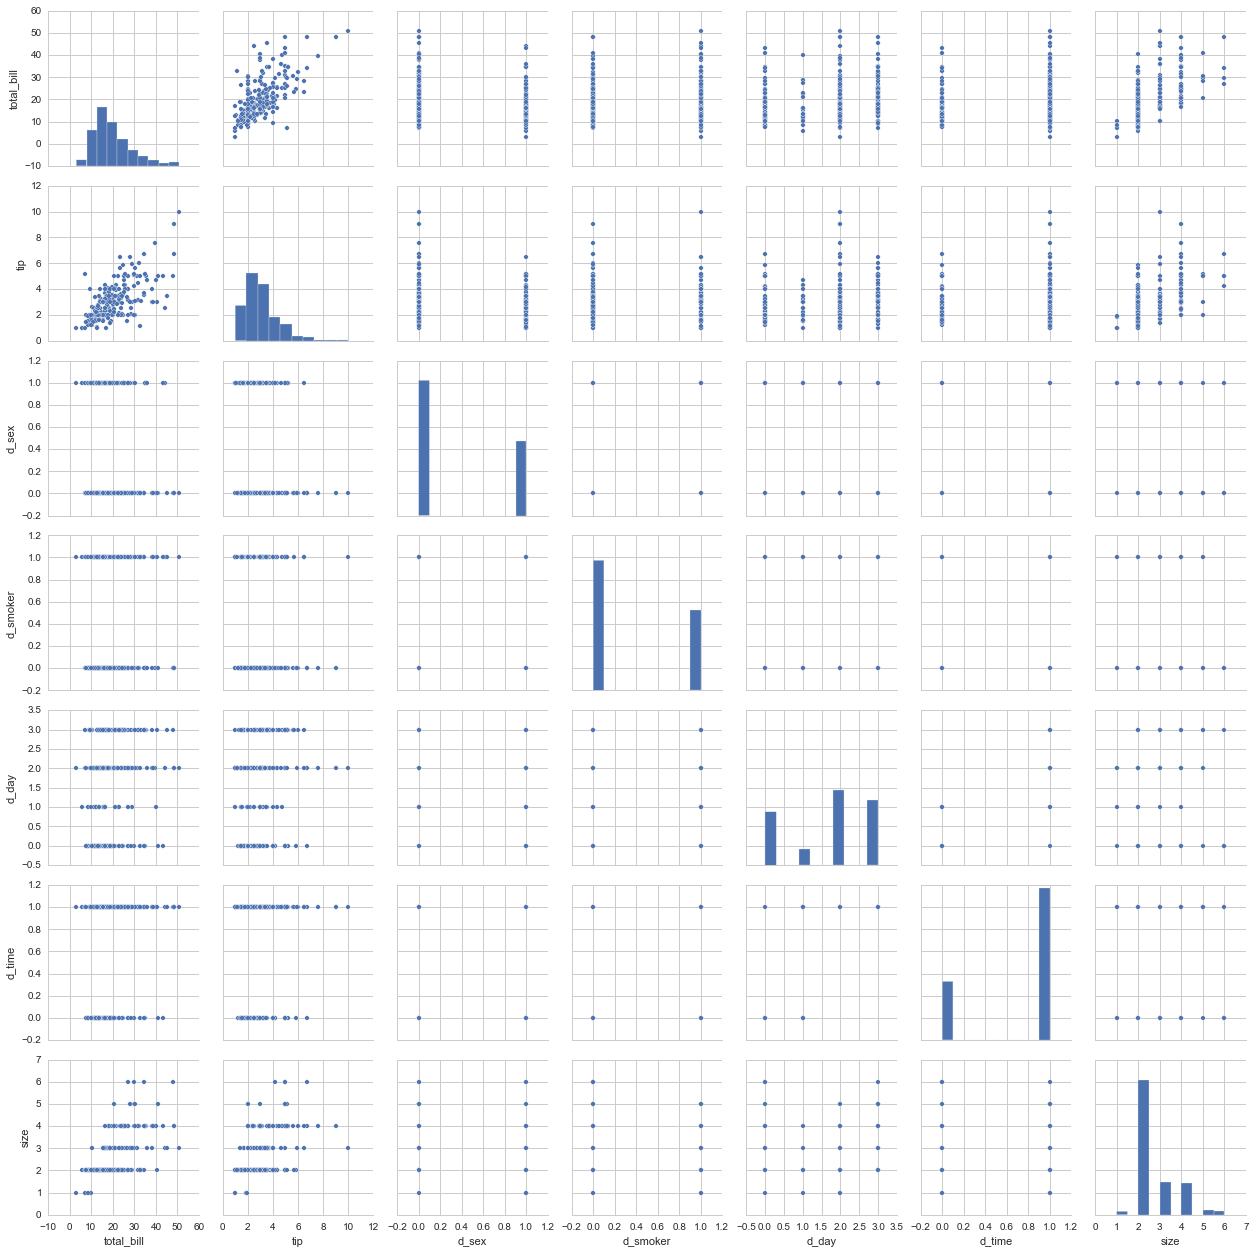

In [42]:
sns.pairplot(data=tips, vars=["total_bill","tip","d_sex","d_smoker","d_day","d_time","size"])

In [36]:
tips['d_sex'] = [0 if s == 'Male' else 1 for s in tips.sex]

In [38]:
tips['d_time'] = [0 if s == 'Lunch' else 1 for s in tips.time]

In [39]:
tips['d_smoker'] = [0 if s == 'No' else 1 for s in tips.smoker]

In [40]:
def day_to_digit(x):
    if x == 'Thur':
        return 0
    elif x == 'Fri':
        return 1
    elif x == 'Sat':
        return 2
    else:
        return 3
tips['d_day'] = [day_to_digit(s) for s in tips.day]

In [53]:
print tips

     total_bill   tip     sex smoker   day    time  size  d_sex  d_time  \
0         16.99  1.01  Female     No   Sun  Dinner     2      1       1   
1         10.34  1.66    Male     No   Sun  Dinner     3      0       1   
2         21.01  3.50    Male     No   Sun  Dinner     3      0       1   
3         23.68  3.31    Male     No   Sun  Dinner     2      0       1   
4         24.59  3.61  Female     No   Sun  Dinner     4      1       1   
5         25.29  4.71    Male     No   Sun  Dinner     4      0       1   
6          8.77  2.00    Male     No   Sun  Dinner     2      0       1   
7         26.88  3.12    Male     No   Sun  Dinner     4      0       1   
8         15.04  1.96    Male     No   Sun  Dinner     2      0       1   
9         14.78  3.23    Male     No   Sun  Dinner     2      0       1   
10        10.27  1.71    Male     No   Sun  Dinner     2      0       1   
11        35.26  5.00  Female     No   Sun  Dinner     4      1       1   
12        15.42  1.57    

In [56]:
print tips.to_csv()

,total_bill,tip,sex,smoker,day,time,size,d_sex,d_time,d_smoker,d_day
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,0,3
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,0,3
2,21.01,3.5,Male,No,Sun,Dinner,3,0,1,0,3
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,0,3
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,0,3
5,25.29,4.71,Male,No,Sun,Dinner,4,0,1,0,3
6,8.77,2.0,Male,No,Sun,Dinner,2,0,1,0,3
7,26.88,3.12,Male,No,Sun,Dinner,4,0,1,0,3
8,15.04,1.96,Male,No,Sun,Dinner,2,0,1,0,3
9,14.78,3.23,Male,No,Sun,Dinner,2,0,1,0,3
10,10.27,1.71,Male,No,Sun,Dinner,2,0,1,0,3
11,35.26,5.0,Female,No,Sun,Dinner,4,1,1,0,3
12,15.42,1.57,Male,No,Sun,Dinner,2,0,1,0,3
13,18.43,3.0,Male,No,Sun,Dinner,4,0,1,0,3
14,14.83,3.02,Female,No,Sun,Dinner,2,1,1,0,3
15,21.58,3.92,Male,No,Sun,Dinner,2,0,1,0,3
16,10.33,1.67,Female,No,Sun,Dinner,3,1,1,0,3
17,16.29,3.71,Male,No,Sun,Dinner,3,0,1,0,3
18,16.97,3.5,Female,No,Sun,Dinner,3,1,1,0,3
19,20.65,3.35,Male,No,Sat,Dinner,3,0,1,0,2
20,17.92,4.08,Male,No,Sat,Dinner,2,0,1,0,2
21,20.29,2.75,Female,No,Sat,Dinn

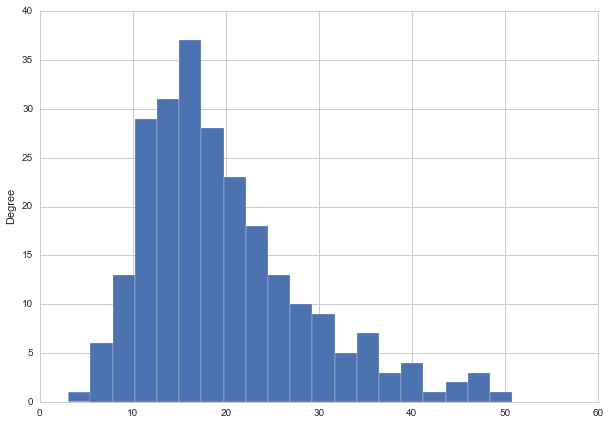

In [59]:
tips.total_bill.plot(kind="hist", bins=20, figsize=(10,7))

19.785942623


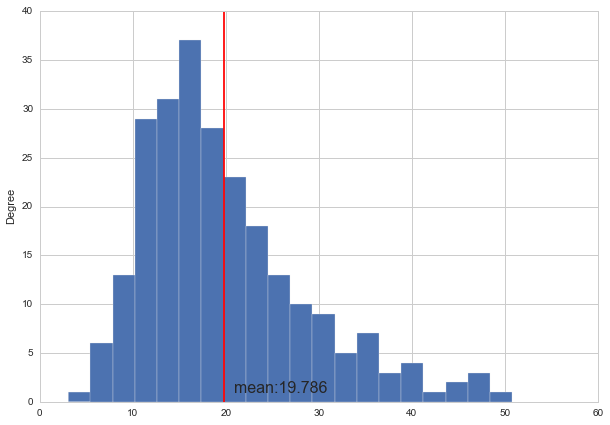

In [103]:
tips.total_bill.plot(kind="hist", bins=20, figsize=(10,7))
m = np.mean(tips.total_bill)
print m
plt.plot([m, m],[0, 40], 'r')
plt.text(21, 1, "mean:{0:.3f}".format(m), size=16)

day
Thur    Axes(0.125,0.125;0.775x0.775)
Fri     Axes(0.125,0.125;0.775x0.775)
Sat     Axes(0.125,0.125;0.775x0.775)
Sun     Axes(0.125,0.125;0.775x0.775)
Name: total_bill, dtype: object

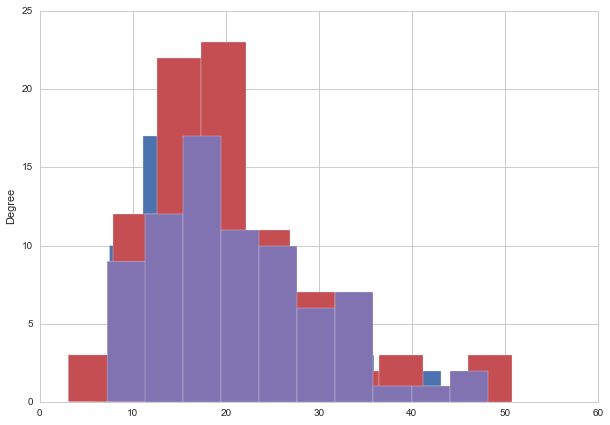

In [66]:
tips.groupby('day').total_bill.plot(kind="hist", bins=20, figsize=(10,7), alpha=.5)

day
Thur    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
Fri     [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
Sat     [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
Sun     [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
dtype: object

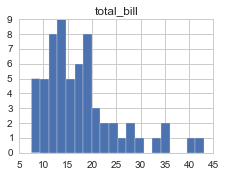

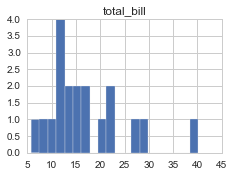

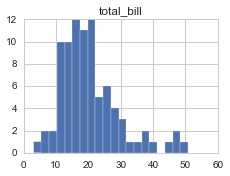

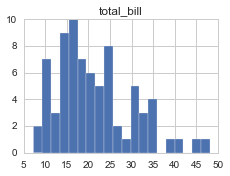

In [71]:
g = tips.groupby('day')
g.hist(column='total_bill', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130c01290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126e70f10>]], dtype=object)

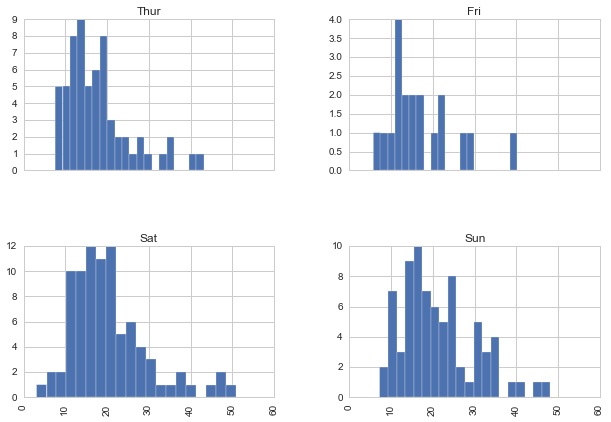

In [76]:
tips.hist(by='day', column='total_bill', bins=20, figsize=(10,7), sharex=True)

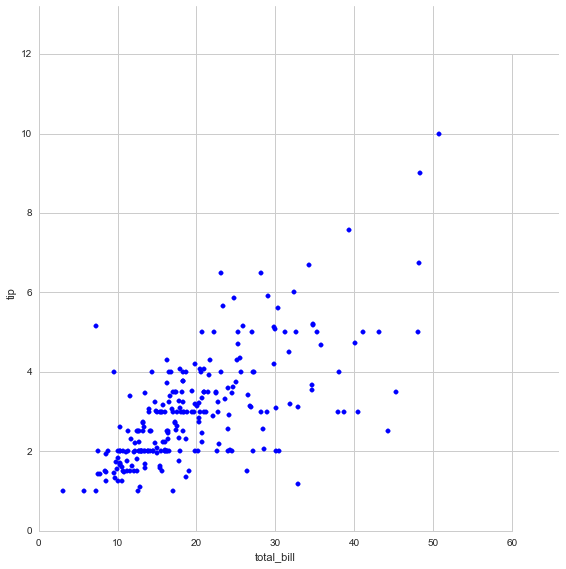

In [88]:
grid = sns.JointGrid(tips.total_bill, tips.tip, space=0, size=8, ratio=10)
grid.plot_joint(plt.scatter, color="b")

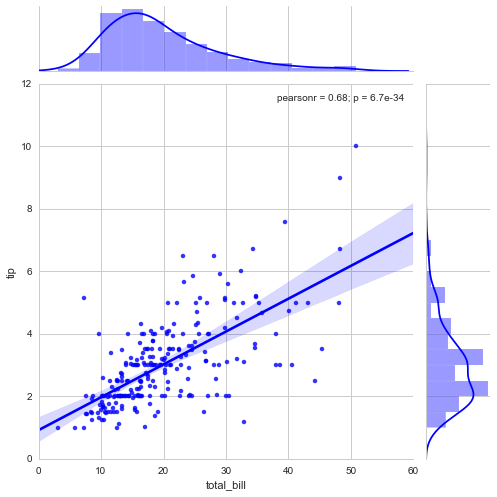

In [79]:
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg", xlim=(0, 60), ylim=(0, 12), color="b", size=7)



In [89]:
help(sns.load_dataset)

Help on function load_dataset in module seaborn.utils:

load_dataset(name, cache=True, data_home=None, **kws)
    Load a dataset from the online repository (requires internet).
    
    Parameters
    ----------
    name : str
        Name of the dataset (`name`.csv on
        https://github.com/mwaskom/seaborn-data).  You can obtain list of
        available datasets using :func:`get_dataset_names`
    cache : boolean, optional
        If True, then cache data locally and use the cache on subsequent calls
    data_home : string, optional
        The directory in which to cache data. By default, uses ~/seaborn_data/
    kws : dict, optional
        Passed to pandas.read_csv



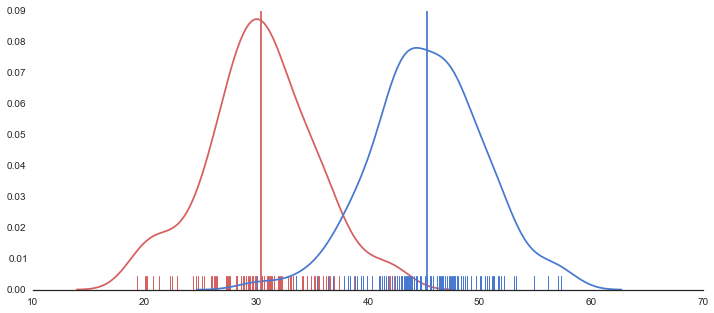

In [123]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=100)
d2 = rs.normal(45, 5, size=100)

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r")#, ax=axes[0, 0])
sns.distplot(d2, hist=False, rug=True, color="b")#, ax=axes[0, 0])

# Calculate average
m = np.mean(d)
m2 = np.mean(d2)

plt.plot([m,m],[0,0.09], 'r')
plt.plot([m2,m2],[0,0.09], 'b')

plt.show()

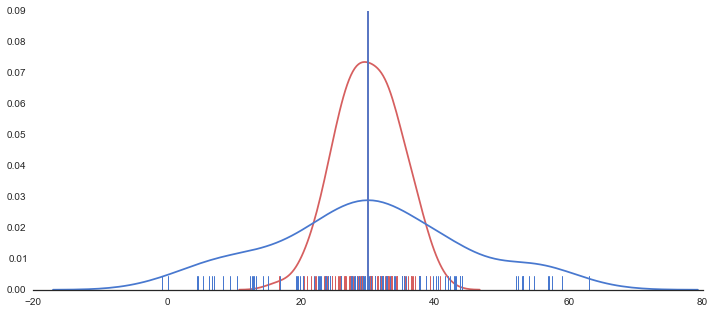

In [125]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(11)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=100)
d2 = rs.normal(30, 15, size=100)
# Plot a simple histogram with binsize determined automatically
#sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r")#, ax=axes[0, 0])
sns.distplot(d2, hist=False, rug=True, color="b")#, ax=axes[0, 0])


# Calculate average
m = np.mean(d)
m2 = np.mean(d2)

plt.plot([m,m],[0,0.09], 'r')
plt.plot([m2,m2],[0,0.09], 'b')

plt.show()

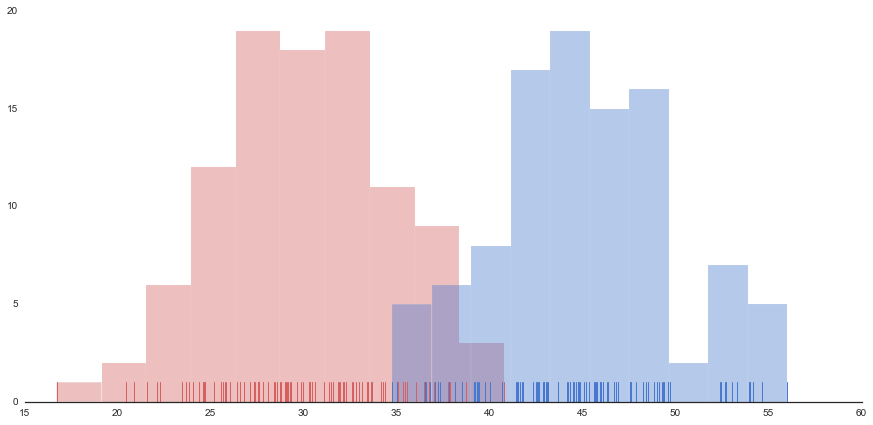

In [139]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(11)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(15, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=100)
d2 = rs.normal(45, 5, size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, rug=True, color="r", bins=10)
sns.distplot(d2, kde=False, rug=True, color="b", bins=10)

plt.show()

In [171]:
help(sns.load_dataset)

Help on function load_dataset in module seaborn.utils:

load_dataset(name, cache=True, data_home=None, **kws)
    Load a dataset from the online repository (requires internet).
    
    Parameters
    ----------
    name : str
        Name of the dataset (`name`.csv on
        https://github.com/mwaskom/seaborn-data).  You can obtain list of
        available datasets using :func:`get_dataset_names`
    cache : boolean, optional
        If True, then cache data locally and use the cache on subsequent calls
    data_home : string, optional
        The directory in which to cache data. By default, uses ~/seaborn_data/
    kws : dict, optional
        Passed to pandas.read_csv



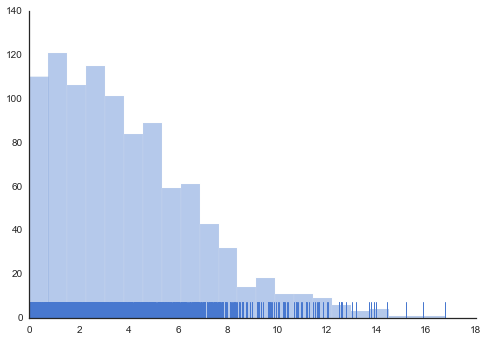

In [185]:

d = rs.normal(30, 5, size=1000)
m = np.mean(d)
sns.distplot(np.abs(d - m), rug=True, kde=False)
sns.despine()

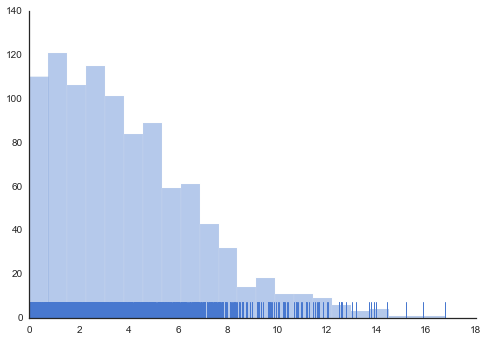

In [186]:
sns.distplot(np.sqrt((d - m)**2), rug=True, kde=False)
sns.despine()

In [191]:
sales = pd.read_csv('icecream.csv')

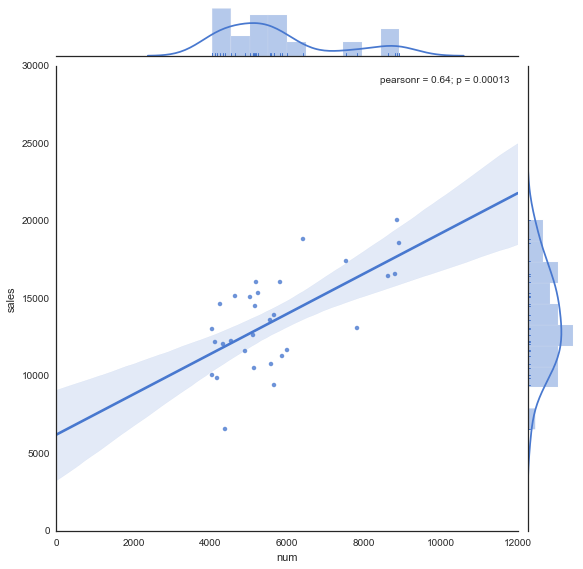

In [205]:
g = sns.jointplot("num", "sales", data=sales, kind="reg", marginal_kws=dict(bins=10, rug=True), color="b", size=8, )



,date,sales,temperature,num
0,2012/8/1,12220,26,4540
1,2012/8/2,15330,32,5250
2,2012/8/3,11680,32,6000
3,2012/8/4,12640,29,5120
4,2012/8/5,15150,34,4640
5,2012/8/6,16440,33,8620
6,2012/8/7,16080,35,5810
7,2012/8/8,9830,34,4170
8,2012/8/9,14520,29,5160
9,2012/8/10,14610,34,4260


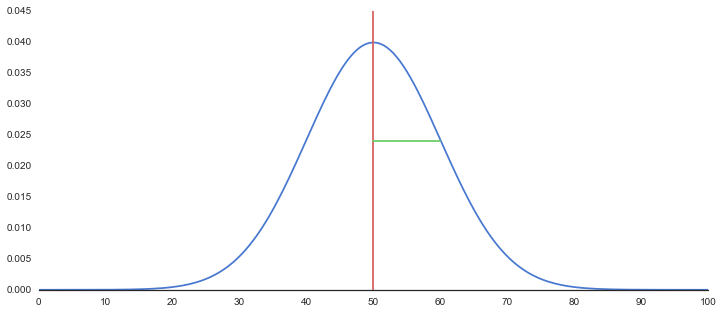

In [228]:
import scipy.stats as st

sns.set(style="white", palette="muted", color_codes=True)
loc = 50
xx = np.linspace(-0,100,201)
d  = st.norm.pdf(xx, loc=loc, scale=10)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.plt.plot(xx, d)
plt.ylim(0, .045)
#plt.xlim(0,10)
plt.plot([loc,loc],[0,0.045], 'r')
plt.plot([loc,loc+10],[0.024,0.024], 'g')
plt.xticks(np.arange(11)*10)

plt.show()

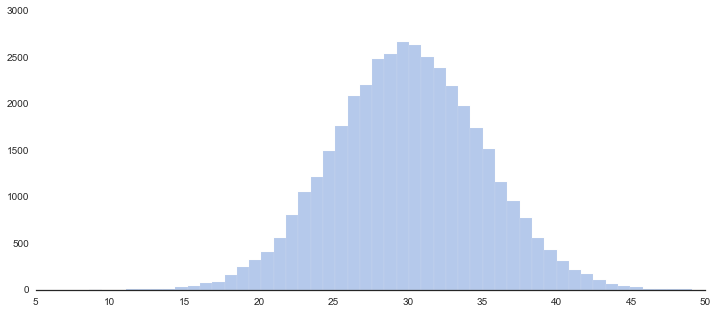

In [239]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(2139)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=40000)

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=True, kde=False, rug=False, color="b")

# Calculate average
m = np.mean(d)

plt.plot([m,m],[0,0.09], 'r')

plt.show()

29.6190522364


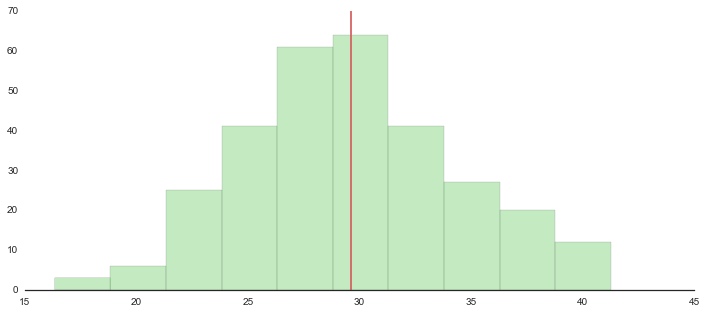

In [6]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState()

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=300)

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=True, kde=False, rug=False, color="g", bins=10)

# Calculate average
m = np.mean(d)
print m
plt.ylim(0,70)
plt.plot([m,m],[0,100], 'r')

plt.show()

30.0158741779


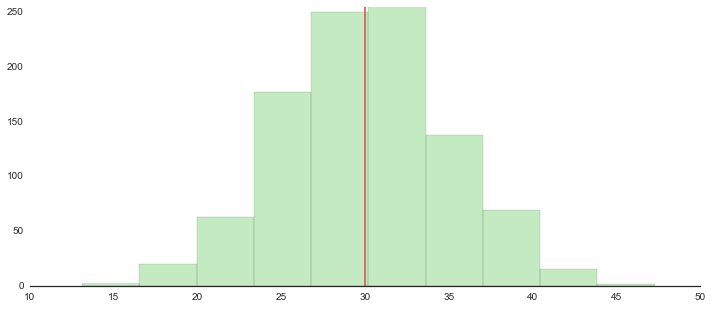

In [7]:
rs = np.random.RandomState(92)
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState()

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=1000)

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=True, kde=False, rug=False, color="g", bins=10)

# Calculate average
m = np.mean(d)
print m
plt.ylim(0,255)
plt.plot([m,m],[0,255], 'r')

plt.show()

30.0129490028


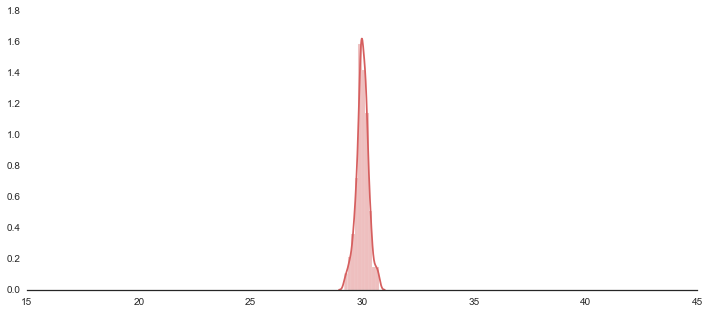

In [300]:
rs = np.random.RandomState(92)
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)


d = rs.normal(30, 5/np.sqrt(300), size=300)
# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=True, kde=True, rug=False, color="r", bins=10)

# Calculate average
m = np.mean(d)
print m
plt.xlim(15,45)
plt.ylim(0,1.8)
#plt.plot([m,m],[0,2], 'r')

plt.show()

30.0129490028


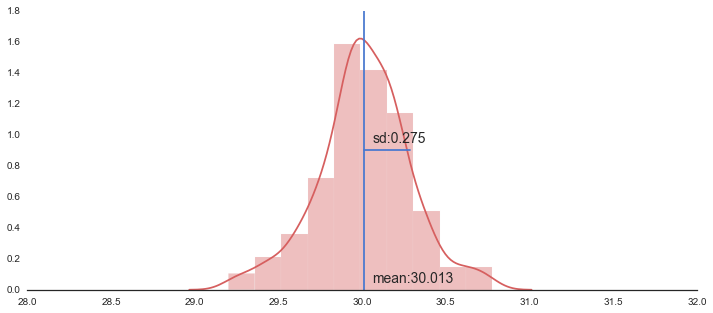

In [304]:
rs = np.random.RandomState(92)
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)


d = rs.normal(30, 5/np.sqrt(300), size=300)
# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=True, kde=True, rug=False, color="r", bins=10)

# Calculate average
m = np.mean(d)
sd = np.sqrt(d.var())
print m
plt.xlim(28,32)
plt.ylim(0,1.8)

plt.plot([m,m],[0,1.8], "b")
plt.text(m+.05, 0.05, "mean:{0:.3f}".format(m), size=14)
plt.plot([m,m+sd],[0.9,0.9], "b")
plt.text(m+.05, 0.95, "sd:{0:.3f}".format(sd), size=14)


#plt.plot([m,m],[0,2], 'r')

plt.show()

30.0129490028


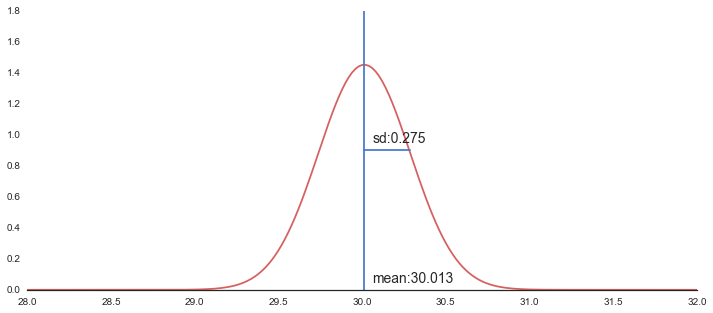

In [305]:
rs = np.random.RandomState(92)
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)


d = rs.normal(30, 5/np.sqrt(300), size=300)

# Plot a kernel density estimate and rug plot
#sns.distplot(d, hist=True, kde=False, rug=False, color="r", bins=10)

# Calculate average
m = np.mean(d)
sd = np.sqrt(d.var())

print m
plt.xlim(28,32)
plt.ylim(0,1.8)
#plt.plot([m,m],[0,2], 'r')


xx = np.linspace(28,32,201)
dd  = st.norm.pdf(xx, loc=m, scale=sd)

# Set up the matplotlib figure
#f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
#sns.despine(left=True)
#print xx
# Plot a kernel density estimate and rug plot
sns.plt.plot(xx, dd, color="r")
plt.plot([m,m],[0,1.8], "b")
plt.text(m+.05, 0.05, "mean:{0:.3f}".format(m), size=14)
plt.plot([m,m+sd],[0.9,0.9], "b")
plt.text(m+.05, 0.95, "sd:{0:.3f}".format(sd), size=14)
#plt.ylim(0, .045)
#plt.xlim(0,10)
#plt.plot([loc,loc],[0,0.045], 'r')
#plt.plot([loc,loc+10],[0.024,0.024], 'g')
#plt.xticks(np.arange(11)*10)


plt.show()

30.0129490028


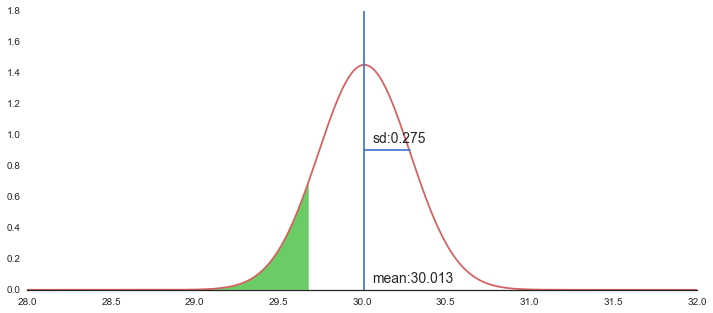

In [315]:
rs = np.random.RandomState(92)
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)


d = rs.normal(30, 5/np.sqrt(300), size=300)

# Plot a kernel density estimate and rug plot
#sns.distplot(d, hist=True, kde=False, rug=False, color="r", bins=10)

# Calculate average
m = np.mean(d)
sd = np.sqrt(d.var())

print m
plt.xlim(28,32)
plt.ylim(0,1.8)
#plt.plot([m,m],[0,2], 'r')


xx = np.linspace(28,32,201)
dd  = st.norm.pdf(xx, loc=m, scale=sd)

# Set up the matplotlib figure
#f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
#sns.despine(left=True)
#print xx
# Plot a kernel density estimate and rug plot
sns.plt.plot(xx, dd, color="r")
plt.plot([m,m],[0,1.8], "b")
plt.text(m+.05, 0.05, "mean:{0:.3f}".format(m), size=14)
plt.plot([m,m+sd],[0.9,0.9], "b")
plt.text(m+.05, 0.95, "sd:{0:.3f}".format(sd), size=14)
plt.fill_between(xx[:85], dd[:85], color="g", zorder=0)
#plt.ylim(0, .045)
#plt.xlim(0,10)
#plt.plot([loc,loc],[0,0.045], 'r')
#plt.plot([loc,loc+10],[0.024,0.024], 'g')
#plt.xticks(np.arange(11)*10)


plt.show()

30.0129490028
29.5 - 30.6
0.221262940638 0.200030810432 0.0212321302059


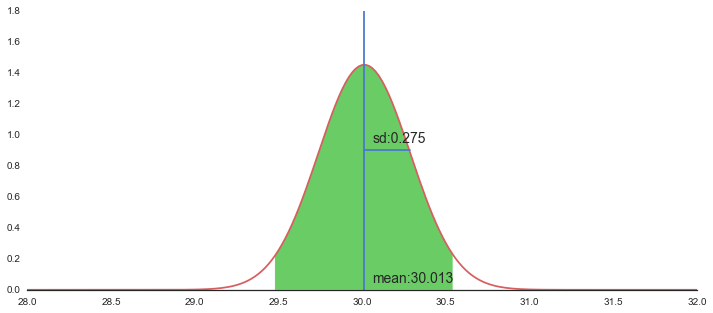

In [346]:
rs = np.random.RandomState(92)
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)


d = rs.normal(30, 5/np.sqrt(300), size=300)

# Calculate average
m = np.mean(d)
sd = np.sqrt(d.var())

print m
plt.xlim(28,32)
plt.ylim(0,1.8)

xx = np.linspace(28,32,201)
dd  = st.norm.pdf(xx, loc=m, scale=sd)
sns.plt.plot(xx, dd, color="r")
plt.plot([m,m],[0,1.8], "b")
plt.text(m+.05, 0.05, "mean:{0:.3f}".format(m), size=14)
plt.plot([m,m+sd],[0.9,0.9], "b")
plt.text(m+.05, 0.95, "sd:{0:.3f}".format(sd), size=14)

s = 74
e = 128
plt.fill_between(xx[s:e], dd[s:e], color="g", zorder=0)

print "{0:.1f} - {1:.1f}".format(m - 1.96*sd, m + 1.96*sd)

print dd[s],dd[e], dd[s]-dd[e]
plt.show()